# Proyek Analisis Data: Bike Sharing

- Nama: Dhafa Alifandra
- Email: Dhafa71110@gmial.com
- ID Dicoding: andradhf

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor lingkungan dan musiman (seperti cuaca, suhu, kelembaban, dan kecepatan angin) terhadap jumlah sewa sepeda setiap jam atau harian?
- bagaimana jumlah penyewa sepeda perbulannya ?
- siapa jenis pengguna yang paling sering menyewa sepeda ?
- Apakah ada pola perubahan penggunaan sepeda yang berkorelasi dengan peristiwa besar atau anomali di Washington D.C.?


## Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
print("jumlah duplikasi : ", hour_df.duplicated().sum())

jumlah duplikasi :  0


In [7]:
count_hum_zeros_day = (day_df['hum'] == 0.0).sum()
print("Jumlah data dengan nilai hum = 0.0 : ", count_hum_zeros_day)

Jumlah data dengan nilai hum = 0.0 :  1


In [8]:
windspeed_zeros_day = (day_df['windspeed']==0.0).sum()
print("jumlah data windspeed dengan nilai 0 :",windspeed_zeros_day)

jumlah data windspeed dengan nilai 0 : 0


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
print("jumlah duplikasi : ", hour_df.duplicated().sum())

jumlah duplikasi :  0


In [12]:
humidity_zeros_hour = (hour_df['hum'] == 0.0).sum()
print("jumlah data Humidity dengan nilai 0 :",humidity_zeros_hour)

jumlah data Humidity dengan nilai 0 : 22


In [13]:
windspeed_zeros_hour = (hour_df['windspeed']==0.0).sum()
print("jumlah data windspeed dengan nilai 0 :",windspeed_zeros_hour)

jumlah data windspeed dengan nilai 0 : 2180


Insight : 
- data pada colom dtday memiliki tipe data yang salah seharusnya date bukan object
- nilai minimum pada kolom hum pada data day dan hour adalah 0.0 hal ini tidak mungkin terjadi sehingga kemungkinan ada kesalahan pada data
- nilai minimum pada kolom windspeed di data hour adalah 0.0 sedangkan di data day nilai minimum nya bukan 0 kemungkinan ini ada kesalahan pada data 

### Cleaning Data

In [14]:
datetime_columns = ["dteday"]
for column in datetime_columns :
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### mengatasi data humidity 0.0 pada data day dan hour

data humidity 0.0 berada di season 1 (spring), saat sping tidak mungkin humidity mencapai 0.0, maka data ini adalah inaccurate value

In [17]:
day_df[day_df.hum == 0.0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [18]:
day_df = day_df[day_df['hum'] != 0.0]

In [19]:
count_hum_zeros_day = (day_df['hum'] == 0.0).sum()
print("Jumlah data dengan nilai hum = 0.0 : ", count_hum_zeros_day)

Jumlah data dengan nilai hum = 0.0 :  0


In [20]:
hour_df[hour_df.hum == 0.0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [21]:
season_1_df = hour_df[hour_df['season'] == 1]
season_1_df[season_1_df.hum == season_1_df.hum.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
26,27,2011-01-02,1,0,1,2,0,0,0,2,0.42,0.4242,1.0,0.2836,1,8,9
721,722,2011-02-02,1,0,2,10,0,3,1,2,0.22,0.2727,1.0,0.0000,2,59,61
786,787,2011-02-05,1,0,2,5,0,6,0,3,0.20,0.2273,1.0,0.0896,0,9,9
787,788,2011-02-05,1,0,2,6,0,6,0,3,0.20,0.2576,1.0,0.0000,0,4,4
789,790,2011-02-05,1,0,2,8,0,6,0,3,0.20,0.2273,1.0,0.0896,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9777,9778,2012-02-17,1,1,2,8,0,5,1,2,0.26,0.3030,1.0,0.0000,4,516,520
9778,9779,2012-02-17,1,1,2,9,0,5,1,2,0.26,0.3030,1.0,0.0000,8,275,283
10468,10469,2012-03-17,1,1,3,7,0,6,0,2,0.40,0.4091,1.0,0.1343,29,57,86
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.0,0.0000,5,43,48


In [22]:
season_1_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,4242.000000,4242,4242.0,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,6302.008015,2011-09-23 22:42:15.785007360,1.0,0.512494,3.119755,11.648515,0.038661,3.008722,0.658652,1.460160,0.299147,0.298116,0.581348,0.215107,14.290901,96.823668,111.114569
min,1.000000,2011-01-01 00:00:00,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1061.250000,2011-02-16 00:00:00,1.0,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.220000,0.212100,0.430000,0.104500,1.000000,21.000000,23.000000
50%,8698.500000,2012-01-03 00:00:00,1.0,1.000000,2.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.280000,0.287900,0.560000,0.194000,5.000000,66.000000,76.000000
75%,9758.750000,2012-02-16 00:00:00,1.0,1.000000,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.360000,0.378800,0.740000,0.298500,15.000000,135.000000,158.000000
max,17379.000000,2012-12-31 00:00:00,1.0,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.720000,0.651500,1.000000,0.806000,367.000000,681.000000,801.000000
std,5028.056396,NaN,0.0,0.499903,3.411534,6.899606,0.192808,2.037880,0.474218,0.653247,0.118726,0.114405,0.199403,0.136914,27.463006,104.347605,119.224010


In [23]:
hour_df['hum'] = hour_df['hum'].replace(0.0, np.nan)  
hour_df['hum'] = hour_df['hum'].interpolate()

In [24]:
humidity_zeros_hour = (hour_df['hum'] == 0.0).sum()
print("jumlah data Humidity dengan nilai 0 :",humidity_zeros_hour)

jumlah data Humidity dengan nilai 0 : 0


In [25]:
season_1_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,4242.000000,4242,4242.0,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,6302.008015,2011-09-23 22:42:15.785007360,1.0,0.512494,3.119755,11.648515,0.038661,3.008722,0.658652,1.460160,0.299147,0.298116,0.581348,0.215107,14.290901,96.823668,111.114569
min,1.000000,2011-01-01 00:00:00,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1061.250000,2011-02-16 00:00:00,1.0,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.220000,0.212100,0.430000,0.104500,1.000000,21.000000,23.000000
50%,8698.500000,2012-01-03 00:00:00,1.0,1.000000,2.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.280000,0.287900,0.560000,0.194000,5.000000,66.000000,76.000000
75%,9758.750000,2012-02-16 00:00:00,1.0,1.000000,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.360000,0.378800,0.740000,0.298500,15.000000,135.000000,158.000000
max,17379.000000,2012-12-31 00:00:00,1.0,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.720000,0.651500,1.000000,0.806000,367.000000,681.000000,801.000000
std,5028.056396,NaN,0.0,0.499903,3.411534,6.899606,0.192808,2.037880,0.474218,0.653247,0.118726,0.114405,0.199403,0.136914,27.463006,104.347605,119.224010


## Exploratory Data Analysis

In [26]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2012-01-01 09:45:51.780822016,2.498630,0.501370,6.524658,0.028767,2.995890,0.683562,1.393151,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2011-07-03 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,2012-01-01 12:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,2012-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.023699,NaN,1.110184,0.500341,3.451815,0.167266,2.005817,0.465405,0.542015,0.183134,0.163040,0.140614,0.077506,686.449738,1557.149836,1933.194931


In [27]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.410693,0.865864,0.495761,0.015835,0.000950,-0.003031,-0.015912,0.149698,0.151825,0.007987,-0.111058,0.273629,0.658468,0.627545
dteday,1.000000,1.000000,0.410693,0.865864,0.495761,0.015835,0.000950,-0.003031,-0.015912,0.149698,0.151825,0.007987,-0.111058,0.273629,0.658468,0.627545
season,0.410693,0.410693,1.000000,-0.003701,0.831183,-0.010868,-0.002159,0.013762,0.024832,0.333735,0.342366,0.200230,-0.227760,0.208695,0.409580,0.404013
yr,0.865864,0.865864,-0.003701,1.000000,-0.003197,0.007724,-0.004778,-0.001081,-0.044983,0.046850,0.045400,-0.118371,-0.010566,0.247343,0.593533,0.565907
mnth,0.495761,0.495761,0.831183,-0.003197,1.000000,0.018964,0.010218,-0.004956,0.047967,0.219601,0.226905,0.219132,-0.206481,0.121572,0.291715,0.278139
holiday,0.015835,0.015835,-0.010868,0.007724,0.018964,1.000000,-0.101862,-0.252948,-0.034137,-0.028700,-0.032642,-0.017208,0.006513,0.054050,-0.109505,-0.069012
weekday,0.000950,0.000950,-0.002159,-0.004778,0.010218,-0.101862,1.000000,0.035341,0.029246,0.000229,-0.007166,-0.049885,0.013660,0.060792,0.058889,0.069020
workingday,-0.003031,-0.003031,0.013762,-0.001081,-0.004956,-0.252948,0.035341,1.000000,0.058826,0.053230,0.052717,0.028830,-0.019672,-0.517604,0.306663,0.063217
weathersit,-0.015912,-0.015912,0.024832,-0.044983,0.047967,-0.034137,0.029246,0.058826,1.000000,-0.118994,-0.120126,0.620839,0.036026,-0.244319,-0.254611,-0.291838
temp,0.149698,0.149698,0.333735,0.046850,0.219601,-0.028700,0.000229,0.053230,-0.118994,1.000000,0.991699,0.125160,-0.157338,0.542988,0.540009,0.627774


In [28]:
day_df.groupby(['season','temp']).agg({
    'cnt': 'mean',
    'windspeed': 'mean'
})

cnt  windspeed
season temp                       
1      0.059130   981.0   0.171970
       0.096522   986.0   0.246600
       0.097391  1416.0   0.158330
       0.107500  2368.0   0.184700
       0.127500  1529.0   0.409212
...                 ...        ...
4      0.635000  5820.0   0.196515
       0.636667  4120.0   0.118171
       0.649167  4630.0   0.110700
       0.650000  7393.0   0.134342
       0.657500  7450.0   0.092046

[596 rows x 2 columns]

In [29]:
day_df.groupby(['mnth','season']).agg({
    'cnt' : ['max','min','mean'],
    'registered' : 'mean',
    'casual' : 'mean',
})

cnt                      registered       casual
              max   min         mean         mean         mean
mnth season                                                   
1    1       4521   431  2176.338710  1982.112903   194.225806
2    1       5062  1005  2655.298246  2392.789474   262.508772
3    1       7836   605  3626.717949  2931.641026   695.076923
     2       8362  1536  3947.954545  3162.045455   785.909091
4    2       7460   795  4484.900000  3471.533333  1013.366667
5    2       8294  2633  5349.774194  4135.500000  1214.274194
6    2       8120  3767  5773.850000  4520.225000  1253.625000
     3       7458  4507  5769.400000  4581.350000  1188.050000
7    3       8173  3285  5563.677419  4303.080645  1260.596774
8    3       7865  1115  5664.419355  4502.500000  1161.919355
9    3       8714  1842  5672.704545  4487.840909  1184.863636
     4       8555  2395  6024.500000  4887.687500  1136.812500
10   4       8156    22  5199.225806  4235.354839   963.870968
11   4       6852  1495  4247.183333  3637.133333   610.050000
12   1       3623   441  1954.454545  1660.681818   293.772727
     4       6606   705  4200.950000  3820.200000   380.750000

In [30]:
day_df.loc[day_df['yr'] == 1].groupby('mnth').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                   
       max   min         mean
mnth                         
1     4521  1301  3120.774194
2     5062  1529  3556.448276
3     8362  3194  5318.548387
4     7460  1027  5807.466667
5     8294  2843  6318.225806
6     8120  4127  6761.000000
7     8173  4459  6567.967742
8     7865  4549  6919.451613
9     8714  4073  7285.766667
10    8156    22  6414.225806
11    6852  2277  5088.800000
12    6606   441  3990.741935

## Visualization and explanatory analysis

### 1. Bagaimana pengaruh faktor lingkungan dan musiman (seperti cuaca, suhu, kelembaban, dan kecepatan angin) terhadap jumlah sewa sepeda setiap jam atau harian?

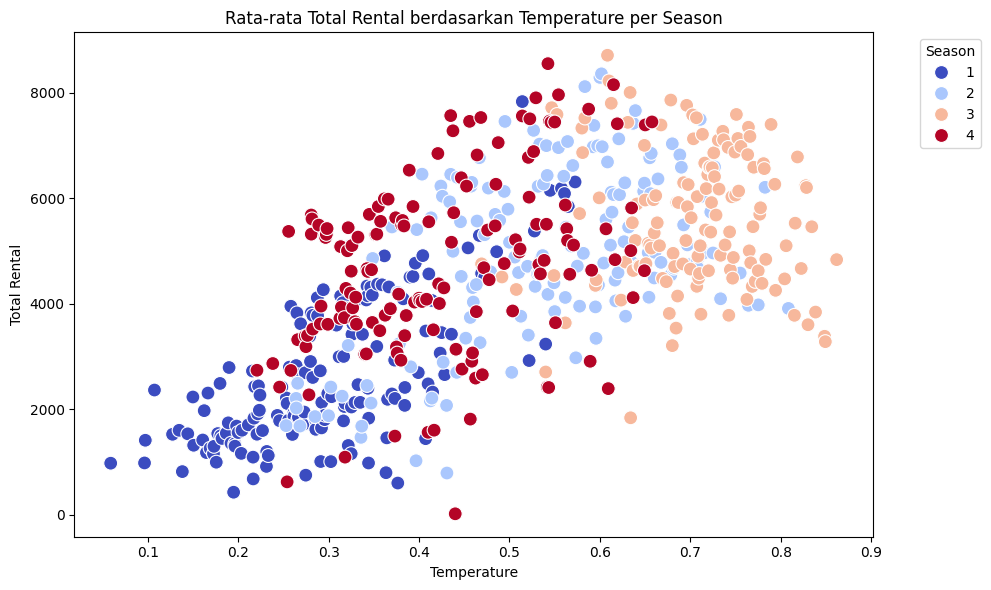

In [31]:
grouped_data = day_df.groupby(['season', 'temp']).agg({
    'cnt': 'mean',
}).reset_index()


plt.figure(figsize=(10, 6))

sns.scatterplot(x='temp', y='cnt', hue='season', data=grouped_data, palette='coolwarm', s=100)

plt.title('Rata-rata Total Rental berdasarkan Temperature per Season')
plt.xlabel('Temperature')
plt.ylabel('Total Rental')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 2. bagaimana jumlah penyewa sepeda perbulannya ?

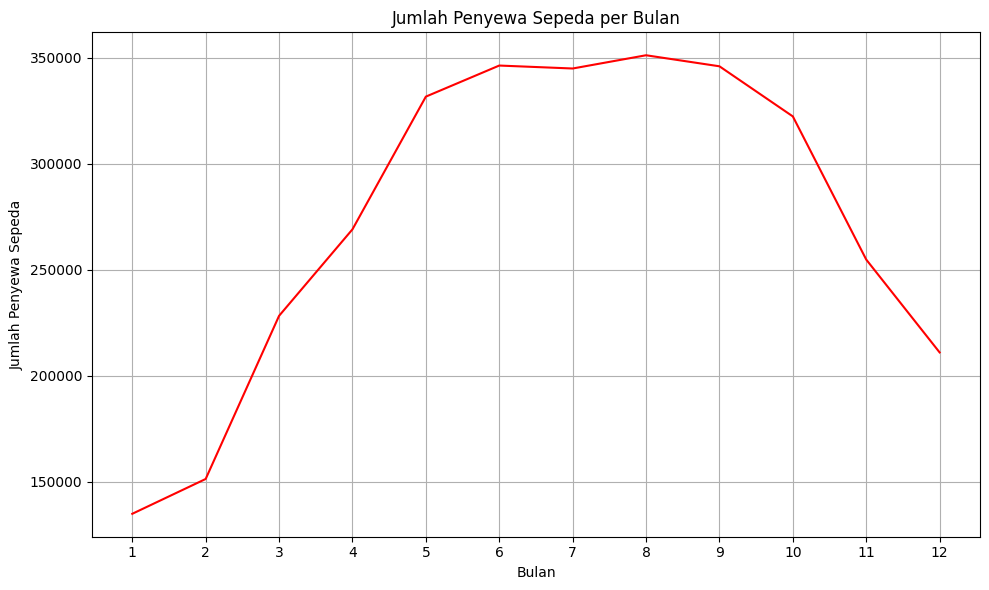

In [32]:
monthly_rentals = day_df.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals['mnth'], monthly_rentals['cnt'], color="red")
plt.title('Jumlah Penyewa Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.xticks(monthly_rentals['mnth'])  
plt.grid()
plt.tight_layout()
plt.show()

### 3.Apakah ada pola perubahan penggunaan sepeda yang berkorelasi dengan peristiwa besar atau anomali di Washington D.C.?

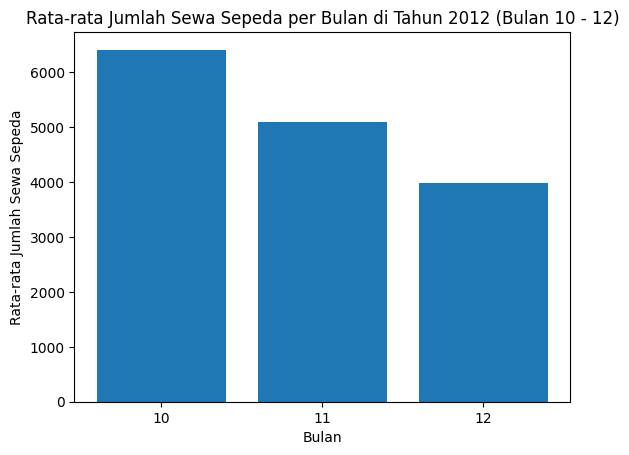

In [33]:
cnt_in_2012_df = day_df.loc[day_df['yr'] == 1].groupby('mnth').agg({
    'cnt': 'mean'
}).reset_index()

# Memfilter data hanya untuk bulan 10 hingga 12
cnt_in_2012_df = cnt_in_2012_df.loc[cnt_in_2012_df['mnth'].isin([10, 11, 12])]

# Visualisasi
plt.bar(x=cnt_in_2012_df['mnth'], height=cnt_in_2012_df['cnt'])
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.title('Rata-rata Jumlah Sewa Sepeda per Bulan di Tahun 2012 (Bulan 10 - 12)')
plt.xticks(cnt_in_2012_df['mnth'])
plt.show()

### 4.siapa jenis pengguna yang paling sering menyewa sepeda ?

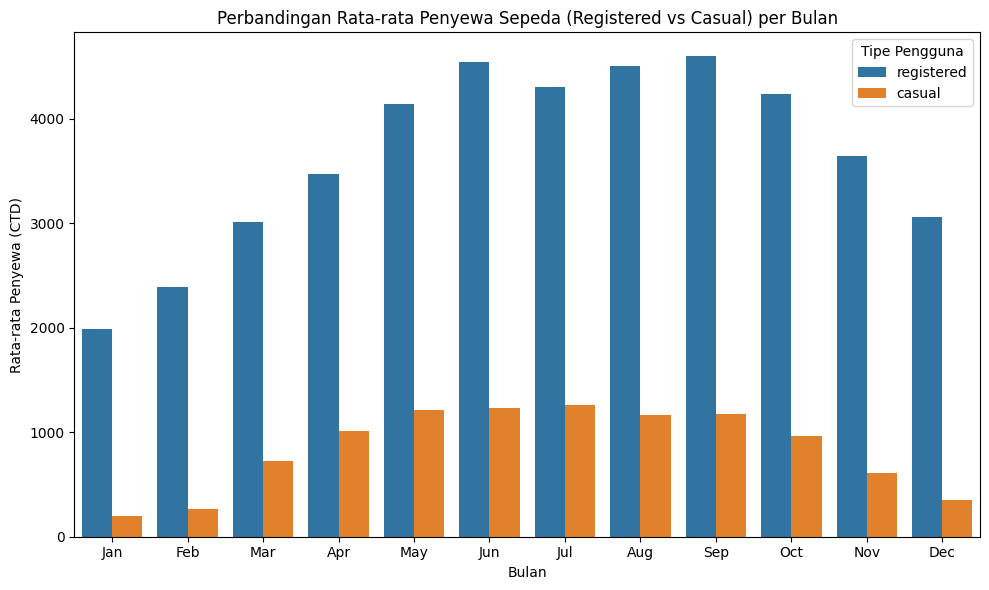

In [34]:
user_df = day_df.groupby("mnth").agg({
    'registered': 'mean',
    'casual': 'mean'
}).reset_index()

user_df_melted = user_df.melt(id_vars='mnth', value_vars=['registered', 'casual'], 
                               var_name='user_type', value_name='ctd')

plt.figure(figsize=(10, 6))
sns.barplot(data=user_df_melted, x="mnth", y="ctd", hue="user_type", errorbar=None)
plt.title('Perbandingan Rata-rata Penyewa Sepeda (Registered vs Casual) per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewa (CTD)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Tipe Pengguna')
plt.tight_layout()
plt.show()

## Analisis Lanjutan ( Opsional )

## Conclusion


- pertanyaan 1 : faktor lingkungan dan musimg sangat berpengaruh ke jumlah pengguna, faktor yang paling berkorelasi dengan jumlah pengguna adalah temperatur suhu, kebanyakan pengguna menggunakan sepeda apa bila hari tersebut suhu nya sejuk
- pertanyaan 2 : jumlah pengguna dari awal tahun meningkat dengan cukup signifikan, namun di paruh akhir mulai mengalami penurunan pengguna, hal tersebut di sebabkan oleh adanya anomaly atau peristiwa besar di wasington d.c.
- pertanyaan 3 : bencana alam yang terjadi jelas sangat berdampak dengan pola perubahan pengguna, perusahaan mengamali pengurangan pengguna di karenakan adanya bencana alam. sehingga banyak pengguna yang tidak menggunakan sepeda
- pertanyaan 4 : berdasarkan data pengguna yang paling banyak menggunakan jasa perusahaan adalah mereka yang sudah terdaftar atau membership, jumlah nya cukup terpaut jauh antara registerd user dan casual user